# Алгоритм K-средних

В прошлом уроке мы выяснили: чтобы находить кластера, нужно уметь находить расстояние между точками. Интуитивно понятно, что точки, которые лежат близко, скорее всего находятся в одном кластере, а вот точки, между которыми расстояние большое, видимо, принадлежат разным кластерам.

Самый простой алгоритм для кластеризации называется "Алгоритм К-средних (K-means)". Буква *K* в названии - это количество кластеров, на которые мы хотим разбить датасет ($K \ge 2$).

Алгоритм основан на следующей идее: давайте разместим центры кластеров в случайных местах, а потом будем их двигать таким образом, чтобы "центры" совпали с областями, где точек больше всего. Визуализация этого алгоритма отображена на gif:

![kmeans8](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/kmeans8.gif)

Формальное описание алгоритма обучения модели:

1. Выберите количество кластеров k. Количество кластеров можно задать с помощью эксперта (который скажет, сколько должно быть кластеров в датасете), либо выбрать количество кластеров интуитивно (я рекомендую всегда использовать количество кластеров $k=2$). О том, как выбирать количество кластеров автоматически, а не вручную, мы поговорим в следующем уроке
1. Инициализировать *случайными значениями* координаты кластеров (они называются центроиды)
1. Для каждой точки нашего набора данных посчитать, к какому центроиду она ближе и раскрасить точку в цвет этого кластера
1. Переместить каждый центроид в центр выборки соответствующих ему элементов. Центр выборки находится как *среднее* всех элементов, входящих в выборку (отсюда и вторая часть названия алгоритма - усреднение).
1. Повторять до выполнения одного из условий
    1. Алгоритм сошелся (положение центроидов не меняется)
    1. Превышено максимально допустимое число итераций
    
Как делать предсказания для входной точки $x$? Очень просто - нужно найти среди кластеров тот, который ближе всего к точке $x$ - например, по евклидовой метрике близости, с которой мы познакомились в первом уроке этого модуля. Какой кластер ближе всего, туда и стоит отнести нашу точку $x$.

Для иллюстрации работы алгоритма, загрузим датасет для кластеризации

In [2]:
import pickle
import numpy as np

# данные получены с помощью функции make_classification
with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

Визуализируем датасет, раскрасив два кластера в разные цвета

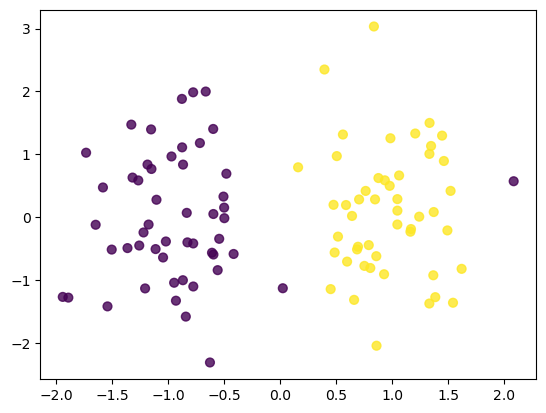

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, marker='o', alpha=0.8, label='data')
plt.show()

В библиотеке sklearn уже есть готовая реализация алгоритма `sklearn.cluster.KMeans` - давайте просто применим её к нашим данным. Точки разобъём на два кластера (параметр *n_clusters=2*):

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


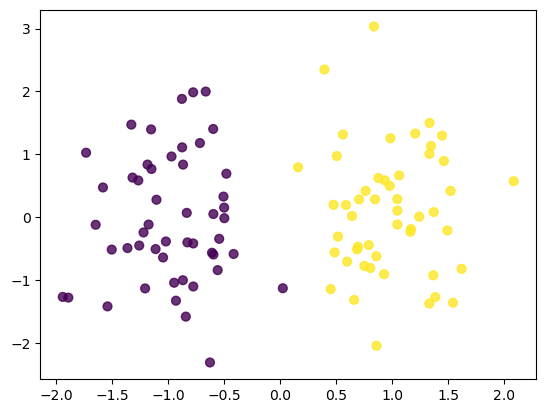

In [6]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X)

plt.scatter(X[:, 0], X[:, 1], s=40, c=kmeans_model.labels_, marker='o', alpha=0.8, label='data')
plt.show()

Готово! Это просто невероятно, но мы в две строчки обучили модель, которая довольно хорошо уловила кластера и правильно проставила метки. При этом мы не давали алгоритму никакой дополнительной информации - единственный параметр, который мы подсказали алгоритму - количество кластеров, на которые нужно разбить датасет.

## Недостатки K-Means

Алгоритм к-средних очень простой и его легко реализовать (мы убедимся в этом в занятии "Урок 4"). Что же может пойти не так?

Во-первых, вычислительная сложность - элементов может быть очень много и нахождение расстояний может отнять значительное время. В этом случае применяют вычисление центроидов по подвыборке, такая модификация получила название **mini batch K-means**

Во-вторых - где лучше инициализировать центроиды, как задать им начальное положение? От начальной инициализации зависит то, куда сойдётся алгоритм и как быстро он это сделаем. Для решения этой проблемы придумали такую эвристику: давайте запускать алгоритм несколько раз и запоминать, куда попали центроиды. После нескольких запусков есть два варианта: усреднить центроиды или выбрать лучший по метрикам качества. Про метрики качества кластеризации мы поговорим в последнем уроке этого модуля